In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [2]:
# 读取excel数据，第一行为列名
file = "data/data.xlsx"
data = pd.read_excel(file, header=0)

# 截取数据的第7列至“总通最大值”
data = data.iloc[:, 6:-3]

# 打印数据的前几行
print(data.head()) 

   重量平均值    重量相对偏差  重量标准偏差  重量变异系数  重量最小值  重量最大值  吸阻平均值    吸阻相对偏差  吸阻标准偏差  \
0  0.516  0.006524   0.011   2.202  0.499  0.538  1.275  0.041404   0.048   
1  0.515  0.004573   0.012   2.350  0.482  0.545  1.321  0.006820   0.046   
2  0.507  0.011032   0.012   2.316  0.477  0.524  1.291  0.029375   0.049   
3  0.507  0.011032   0.013   2.549  0.479  0.529  1.296  0.025616   0.059   
4  0.509  0.007131   0.009   1.863  0.486  0.531  1.350  0.014984   0.058   

   吸阻变异系数  ...  嘴通平均值  嘴通标准偏差  嘴通变异系数  嘴通最小值  嘴通最大值  总通平均值  总通标准偏差  总通变异系数  \
0   3.784  ...   38.0   2.073   5.453   33.7   41.4   44.6   2.006   4.502   
1   3.465  ...   36.1   2.202   6.105   31.3   39.6   43.0   2.106   4.904   
2   3.802  ...   34.8   1.802   5.184   30.9   37.4   42.0   1.810   4.308   
3   4.587  ...   36.3   1.884   5.196   31.4   41.4   42.8   2.027   4.739   
4   4.322  ...   36.3   1.598   4.407   33.1   39.9   42.0   1.577   3.751   

   总通最小值  总通最大值  
0   40.1   48.0  
1   37.8   47.0  
2   38.4   45.

In [3]:
# 检查并处理缺失值（NaNs）和异常值（outliers）
def preprocess_data(df):
    # 检查缺失值
    if df.isnull().values.any():
        # 如果存在缺失值，打印缺失值的索引
        print("缺失值的索引：")
        print(df[df.isnull().any(axis=1)].index.tolist())

        print("数据中存在缺失值，正在处理...")

        df = df.fillna(df.mean())  # 用均值填充缺失值
        print("缺失值已处理。")
    else:
        print("数据中没有缺失值。")

    # 检查异常值
    for column in df.select_dtypes(include=[np.number]).columns:
        if (df[column] < 0).any():
            print(f"列 {column} 存在异常值（负数），正在处理...")
            df[column] = df[column].clip(lower=0)

    print("异常值已处理。")
    return df

data = preprocess_data(data)

缺失值的索引：
[592, 593, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767]
数据中存在缺失值，正在处理...
缺失值已处理。
异常值已处理。


In [4]:
# 进行Z-score标准化
from sklearn.preprocessing import StandardScaler
print("原始数据的统计信息:")
print(data.describe())

# 2. 创建并使用 StandardScaler
# 创建StandardScaler的实例
scaler = StandardScaler()

# 使用 .fit_transform() 一步完成拟合和转换
# 注意：StandardScaler的输出是一个NumPy数组，而不是Pandas DataFrame
scaled_data_numpy = scaler.fit_transform(data)
# 为了方便查看，可以将其转换回DataFrame
scaled_data = pd.DataFrame(scaled_data_numpy, columns=data.columns)

print("\n-------------------------------------------------")
print("\n标准化后数据的统计信息:")
print(scaled_data.describe())

原始数据的统计信息:
             重量平均值       重量相对偏差       重量标准偏差       重量变异系数        重量最小值  \
count  1237.000000  1237.000000  1237.000000  1237.000000  1237.000000   
mean      0.512656     0.007065     0.010463     2.044025     0.490781   
std       0.004634     0.005635     0.001535     0.294834     0.006928   
min       0.501000     0.000087     0.005000     1.006000     0.466000   
25%       0.509500     0.002623     0.009000     1.838300     0.486000   
50%       0.512000     0.005744     0.010300     2.044000     0.491000   
75%       0.515200     0.010425     0.011200     2.222000     0.495000   
max       0.531000     0.035783     0.017100     3.347000     0.518000   

             重量最大值        吸阻平均值       吸阻相对偏差       吸阻标准偏差       吸阻变异系数  ...  \
count  1237.000000  1237.000000  1237.000000  1237.000000  1237.000000  ...   
mean      0.534255     1.330071     0.019747     0.049897     3.750157  ...   
std       0.007185     0.034055     0.016288     0.008702     0.636770  ...   
min   

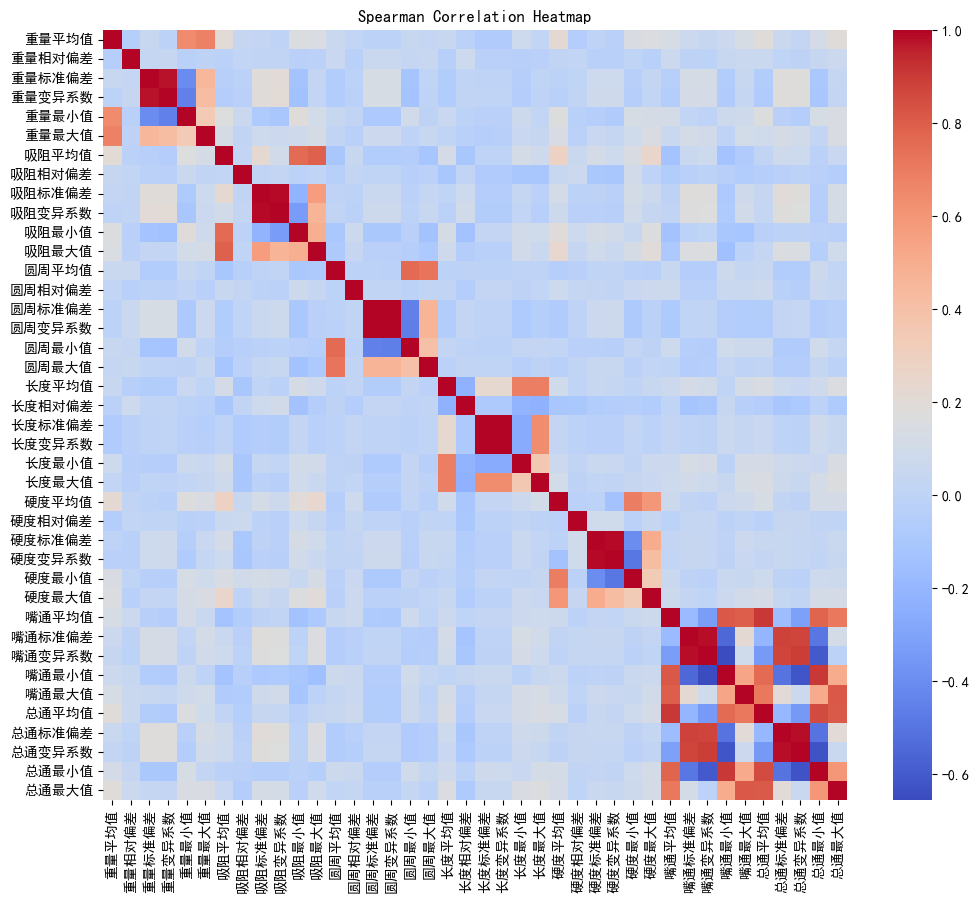

In [7]:
# 1. 计算Spearman相关系数矩阵
correlation_matrix = scaled_data.corr(method='spearman')

# 2. 使用热力图进行可视化
plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10))
seaborn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

In [8]:
# 选择所有指标的平均值进行分析，即第1、7、13、19、25、31、36列
data_selected = scaled_data.iloc[:, [0, 6, 12, 18, 24, 30, 35]]
print("选择后的数据形状:", data_selected.shape)

选择后的数据形状: (1237, 7)


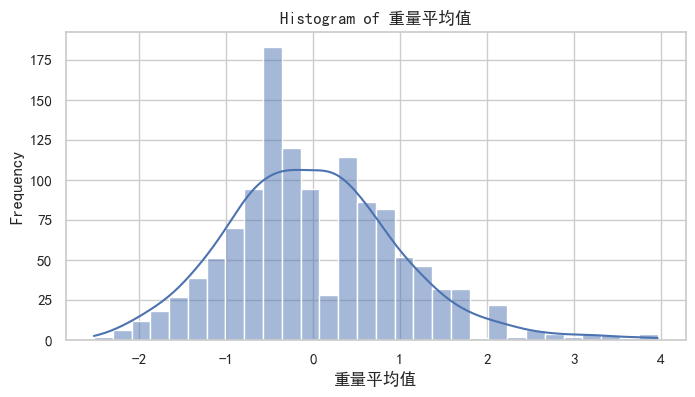

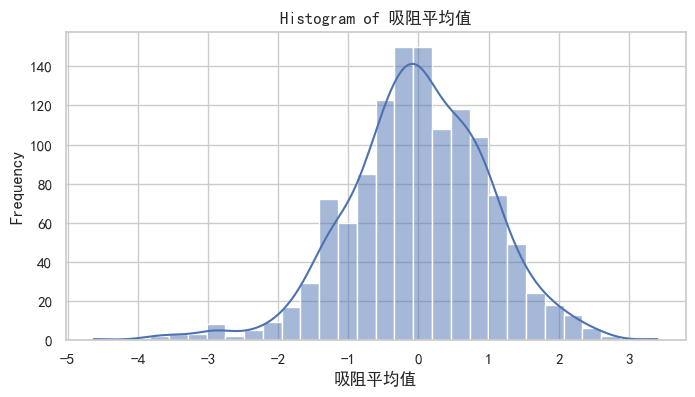

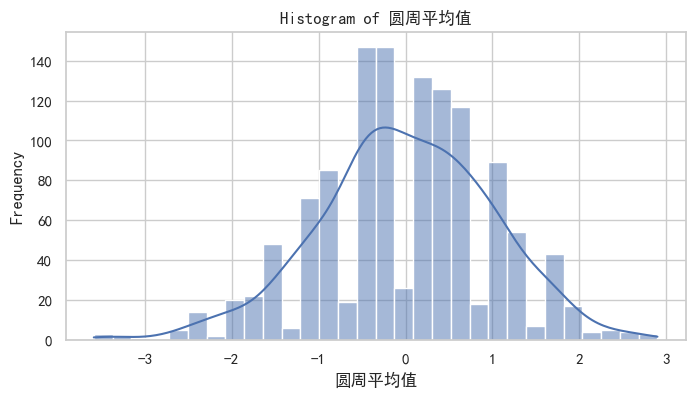

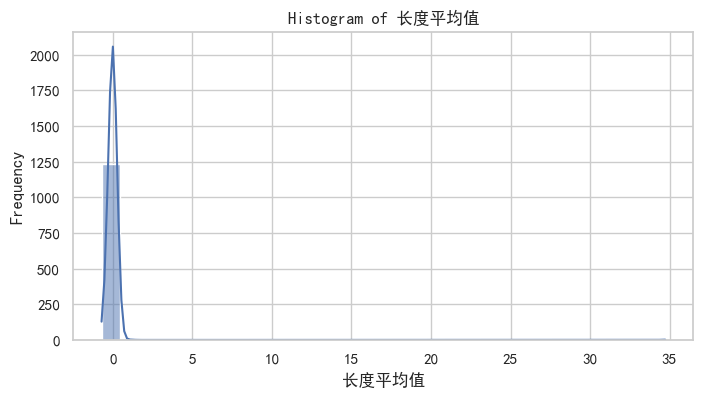

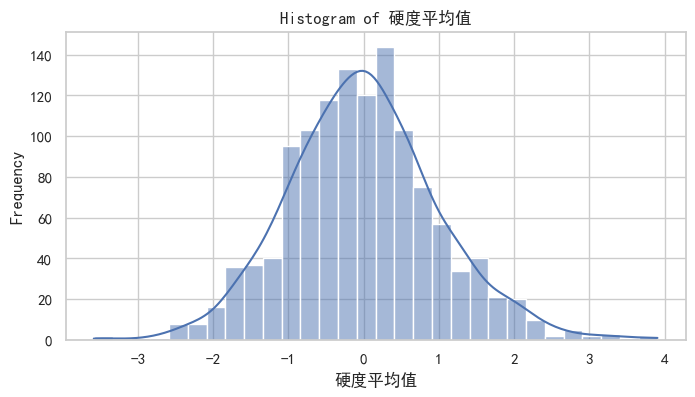

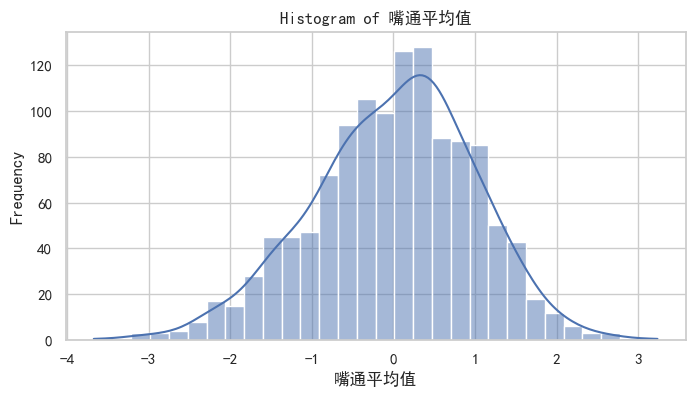

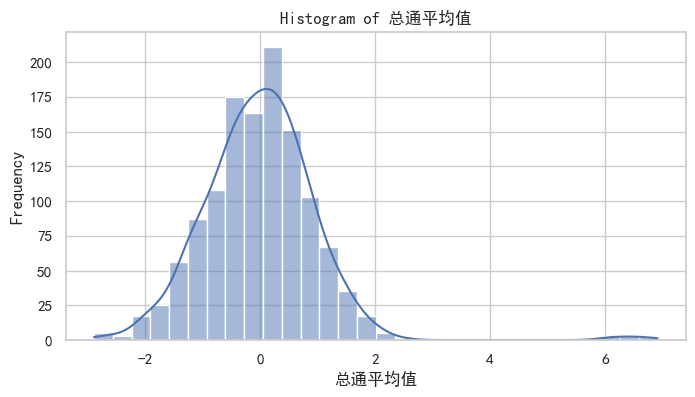

In [9]:
#  查看每个维度的直方图（Histogram）
seaborn.set(style="whitegrid")
for column in data_selected.columns:
    plt.figure(figsize=(8, 4))
    seaborn.histplot(data_selected[column], bins=30, kde=True)
    plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

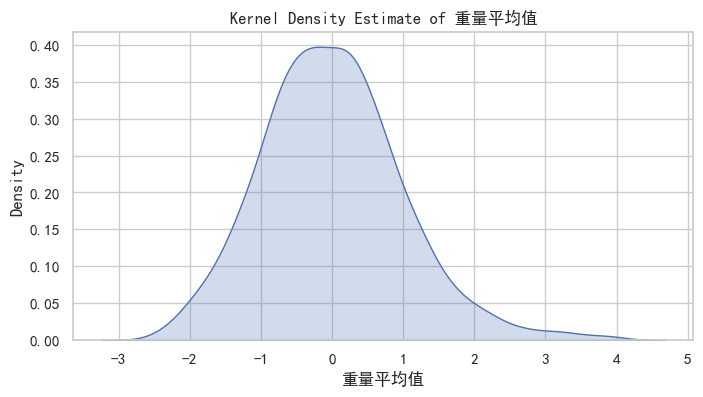

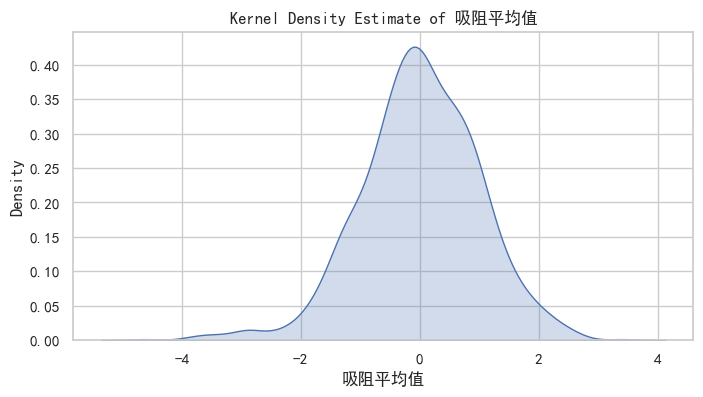

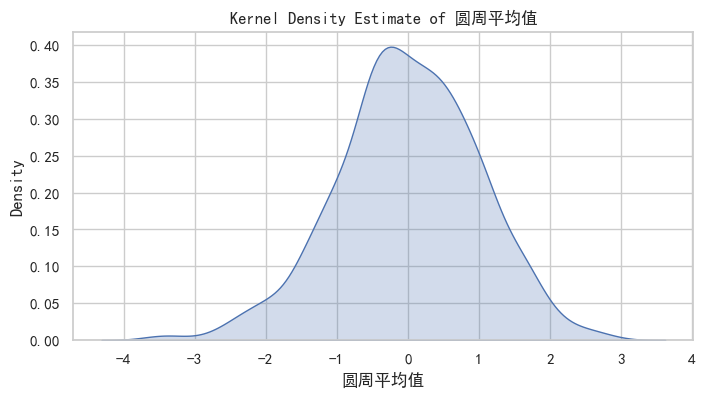

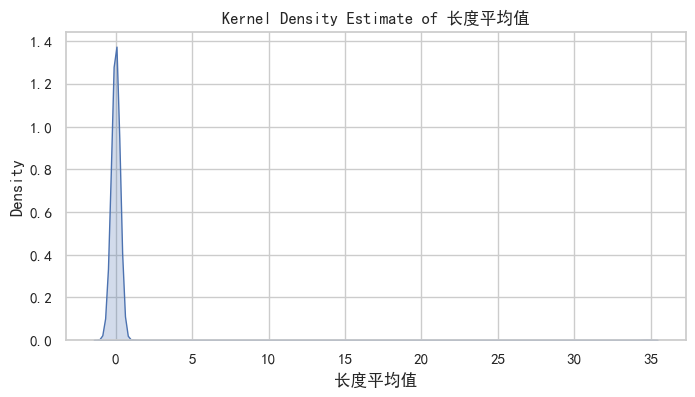

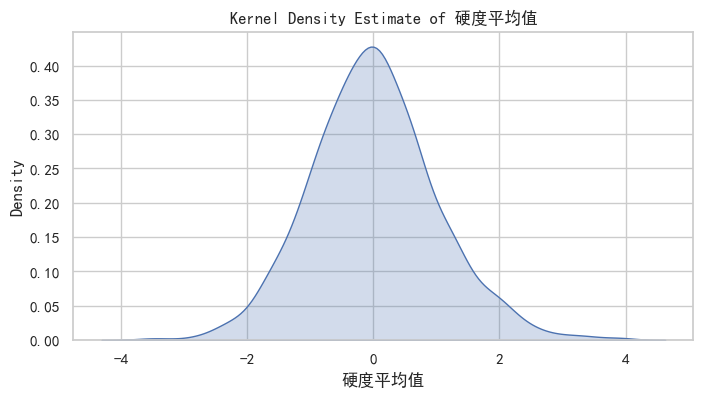

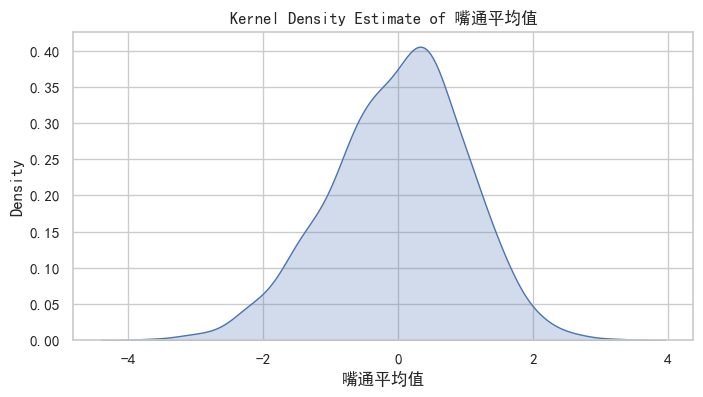

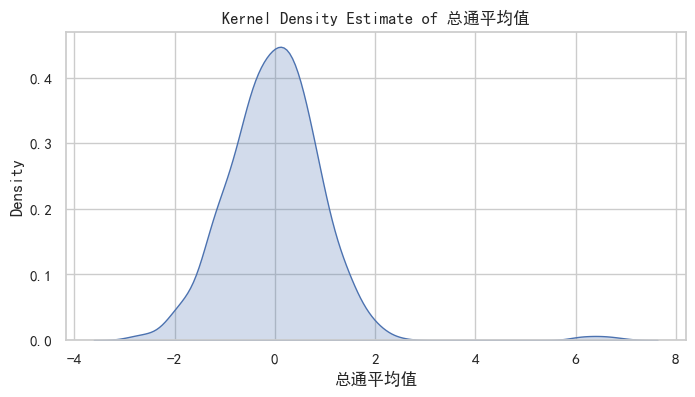

In [10]:
#  查看每个维度的核密度估计（Kernel Density Plot）
for column in data_selected.columns:
    plt.figure(figsize=(8, 4))
    seaborn.kdeplot(data_selected[column], fill=True)

    plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(f'Kernel Density Estimate of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()